In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
sns.set()
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain
from nltk import FreqDist
import spacy

In [488]:
hairdryer=pd.read_csv('Problem_C_Data/hair_dryer.tsv',sep='\t')
microwave=pd.read_csv('Problem_C_Data/microwave.tsv',sep='\t')
pacifier=pd.read_csv('Problem_C_Data/pacifier.tsv',sep='\t')
microwave=microwave[microwave.product_title.str.contains('microwave')]
hairdryer=hairdryer[hairdryer.product_title.str.contains('dryer')]
pacifier=pacifier[pacifier.product_title.str.contains('pacifier')]

In [489]:
sid = SentimentIntensityAnalyzer()
def sentiquantify(sen):
    score = sid.polarity_scores(sen)
    score=score['compound']
    return score

In [490]:
def dataprocess(df):
    df['review_headline']=df['review_headline'].apply(str)
    df['review_body']=df['review_body'].apply(str)
    df['review']=df['review_headline']+'. '+df['review_body']
    df['total_sentiscore']=df['review'].apply(sentiquantify)
    df['review']=df['review'].str.replace("[^a-zA-Z#]", " ")

In [491]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

 # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure()
  ax = sns.barplot(data=d, x="count" , y = "word")
  ax.set(ylabel = 'word')

In [492]:
dataprocess(hairdryer)
dataprocess(microwave)
dataprocess(pacifier)

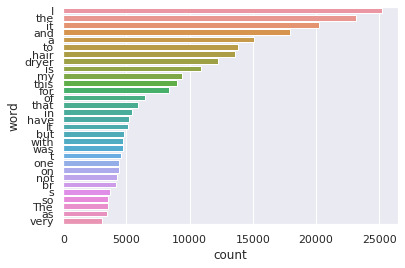

In [493]:
freq_words(hairdryer['review'])

In [494]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev = rev.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    rev_new = rev.apply(lambda x:" ".join([w for w in x.split() if w not in stop_words]))
    rev_new=rev_new.apply(str.lower)
    return rev_new

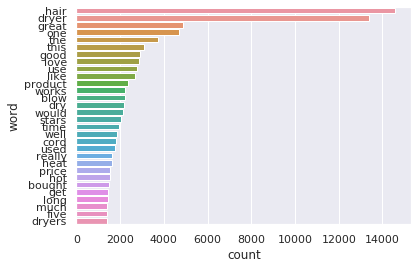

In [495]:
freq_words(remove_stopwords(hairdryer['review']))

In [496]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN','ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [55]:
hairdryerreview=remove_stopwords(hairdryer['review'])
def out(data):
    data=remove_stopwords(data)
    tokenized_reviews = pd.Series(data).apply(lambda x: x.split())
    data=lemmatization(tokenized_reviews)
    for i in range(len(data)):
        data[i]=' '.join(data[i])
    freq_words(data, 30) 

In [56]:
tokenized_reviews = pd.Series(hairdryerreview).apply(lambda x: x.split())

In [57]:
print(tokenized_reviews[1])

['love', 'travel', 'blow', 'dryers', 'easy', 'lift', 'this', 'dries', 'hair', 'faster', 'bigger', 'powerful', 'models', 'love', 'travel', 'blow', 'dryers', 'easy', 'lift', 'usually', 'come', 'less', 'bigger', 'dryers', 'heavy', 'blow', 'hair', 'everywhere', 'this', 'surprising', 'amount', 'power', 'compact', 'would', 'give', 'five', 'except', 'switch', 'easy', 'turn', 'one', 'hand', 'noisier', 'anticipated']


In [58]:
hairdryerreview = lemmatization(tokenized_reviews)

In [59]:
print(hairdryerreview[1]) # print lemmatized review

['love', 'travel', 'blow', 'dryer', 'lift', 'hair', 'model', 'travel', 'blow', 'dryer', 'lift', 'dryer', 'blow', 'hair', 'amount', 'power', 'compact', 'turn', 'hand', 'noisier']


In [60]:
for i in range(len(hairdryerreview)):
    hairdryerreview[i]=' '.join(hairdryerreview[i])

In [61]:
hairdryerreview

['work',
 'love travel blow dryer lift hair model travel blow dryer lift dryer blow hair amount power compact turn hand noisier',
 'star dryer',
 'star hair style',
 'cord length week cord length',
 'star dryer',
 'hand hand metal grate body use comb smoke use hair heat model brand trash',
 'put plug upside flaw noise',
 'star',
 'hairdryer',
 'sale love cut time half',
 'use day week month use day week air',
 'styling tip styling tip stay blow put',
 'jet engine hair voltage',
 'meh product client hair blow cut time half lot power update month air recommend drier price selling rubbish',
 'replacement',
 'girlfriend replace girlfriend blow morning thing ear',
 'dryer attachment drawback hand mousse oil forget struggle switch groove',
 '',
 'star travel',
 'star thank',
 'air year believe fire month turn air flow heat button blow flow blow dryer attempt contact refund repair unit website blow dryer update review company',
 'one free space bathroom',
 'blowdryer year shoulder length hair

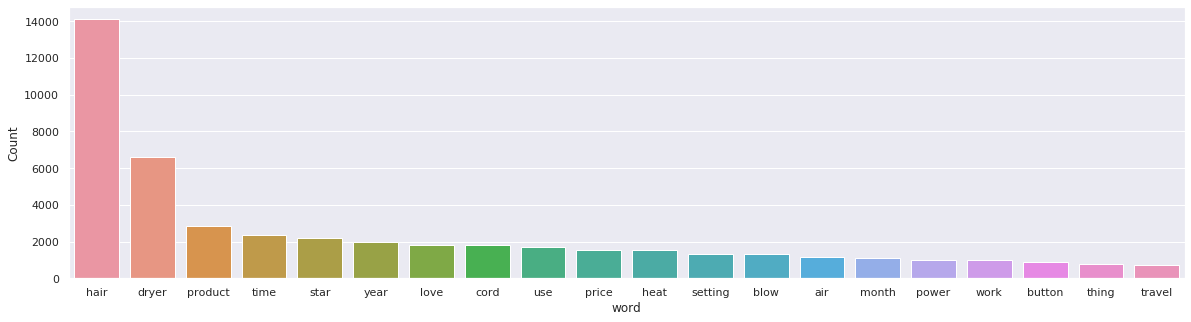

In [64]:
freq_words(hairdryerreview, 20) 

In [52]:
hairdryerreview_n = lemmatization(tokenized_reviews,tags=['NOUN'])

In [53]:
print(hairdryerreview[1])

love travel blow dryer easy lift hair big powerful model travel blow dryer easy lift big dryer heavy blow hair surprising amount power compact easy turn hand noisier


In [497]:
def out(review):
    review=remove_stopwords(review)
    tokenized_reviews = pd.Series(review).apply(lambda x: x.split())
    review=lemmatization(tokenized_reviews)
    for i in range(len(review)):
        review[i]=' '.join(review[i])
    freq_words(review, 30)
    return review

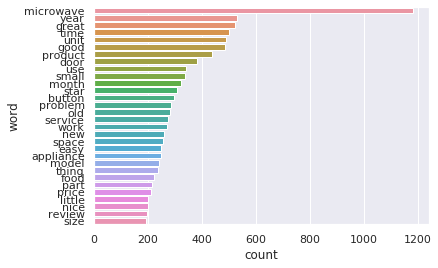

In [502]:
microwave['review']=out(microwave['review'])

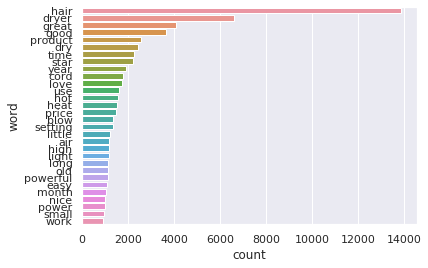

In [501]:
hairdryer['review']=out(hairdryer['review'])

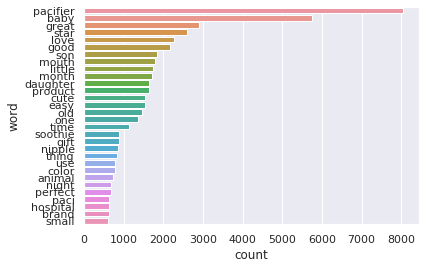

In [499]:
pacifier['review']=out(pacifier['review'])

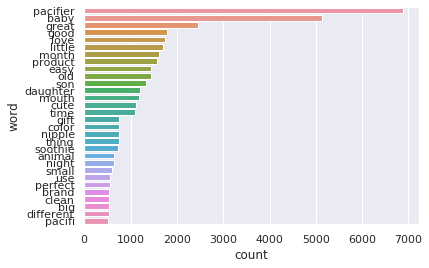

In [500]:
realpacifier['review']=out(realpacifier['review'])

In [ ]:
out(pacifier.loc[:,'review'][pacifier['vine']=='Y'])

In [ ]:
out(hairdryer.loc[:,'review'][hairdryer['vine']=='Y'])

In [ ]:
out(hairdryer.loc[:,'review'][hairdryer['total_sentiscore']>0])

In [503]:
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

In [101]:
reviews_2=remove_stopwords(hairdryer['review'])
tokenized_reviews = pd.Series(reviews_2).apply(lambda x: x.split())
reviews_2=lemmatization(tokenized_reviews)
dictionary = corpora.Dictionary(reviews_2) 
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                                   id2word=dictionary,
                                   num_topics=5, 
                                   random_state=100,
                                   chunksize=1000,
                                   passes=50)

In [102]:
lda_model.print_topics()


[(0,
  '0.104*"great" + 0.102*"product" + 0.075*"good" + 0.065*"star" + 0.041*"price" + 0.027*"wife" + 0.025*"excellent" + 0.020*"love" + 0.014*"quality" + 0.012*"easy"'),
 (1,
  '0.062*"light" + 0.031*"product" + 0.017*"night" + 0.016*"daughter" + 0.015*"worth" + 0.013*"weight" + 0.011*"skin" + 0.010*"time" + 0.010*"money" + 0.008*"day"'),
 (2,
  '0.052*"year" + 0.033*"month" + 0.020*"dryer" + 0.017*"time" + 0.017*"model" + 0.015*"unit" + 0.015*"last" + 0.014*"old" + 0.014*"bathroom" + 0.014*"use"'),
 (3,
  '0.049*"cord" + 0.037*"heat" + 0.036*"setting" + 0.032*"hot" + 0.031*"high" + 0.028*"air" + 0.027*"low" + 0.024*"button" + 0.021*"speed" + 0.020*"cool"'),
 (4,
  '0.172*"hair" + 0.068*"dryer" + 0.029*"dry" + 0.023*"great" + 0.022*"good" + 0.019*"time" + 0.015*"love" + 0.014*"blow" + 0.012*"powerful" + 0.012*"little"')]

In [103]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.089170 -0.093299       1        1  43.684982
3     -0.249717  0.010185       2        1  18.431837
2     -0.096373  0.129439       3        1  17.241291
0      0.184139 -0.273672       4        1  10.755741
1      0.251121  0.227348       5        1   9.886147, topic_info=    Category          Freq     Term         Total  loglift  logprob
8    Default  13716.000000     hair  13716.000000  30.0000  30.0000
0    Default   3870.000000    great   3870.000000  29.0000  29.0000
83   Default   2896.000000  product   2896.000000  28.0000  28.0000
88   Default   3516.000000     good   3516.000000  27.0000  27.0000
20   Default   1279.000000     star   1279.000000  26.0000  26.0000
..       ...           ...      ...           ...      ...      ...
9     Topic5    103.276840     hand    488.273621   0.7606  -5.1648
432   Topic5     79.881744    order    179.922989   1.5021  -5.4217
185   Topic5     89.554939     item    456.318542   0.6857  -5.3074
1     Topic5     83.087616     work    896.511108  -0.0646  -5.3824
241   Topic5     74.893585    color    422.723602   0.5834  -5.4862

[299 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
191       4  0.975105  adjustment
58        1  0.158245         air
58        2  0.841012         air
651       4  0.984705      amazon
231       2  0.993198    annoying
...     ...       ...         ...
1         5  0.092581        work
176       1  0.526549       worth
176       5  0.472677       worth
129       1  0.112239        year
129       3  0.887607        year

[379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

In [504]:
sns.set(style="whitegrid")

In [505]:
hairdryer['sentiment']=hairdryer['total_sentiscore'].apply(lambda x: 'positive' if x>=0 else 'negtive')

In [506]:
microwave['sentiment']=microwave['total_sentiscore'].apply(lambda x: 'positive' if x>=0 else 'negtive')

In [507]:
pacifier['sentiment']=pacifier['total_sentiscore'].apply(lambda x: 'positive' if x>=0 else 'negtive')

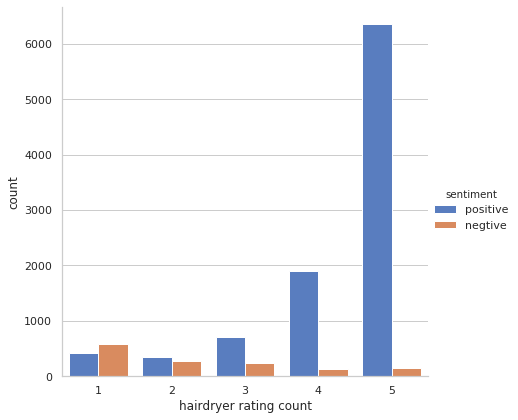

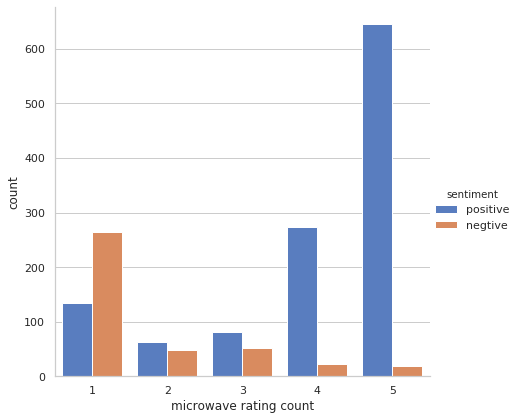

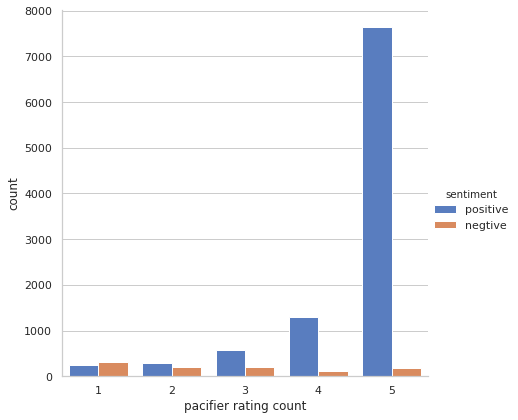

In [508]:
g1 = sns.catplot(x="star_rating", hue="sentiment", data=hairdryer,
                height=6, kind="count", palette="muted")
g1.set_xlabels('hairdryer rating count')

g2 = sns.catplot(x="star_rating", hue="sentiment", data=microwave,
                height=6, kind="count", palette="muted",hue_order=['positive','negtive'])
g2.set_xlabels('microwave rating count')
g3 = sns.catplot(x="star_rating", hue="sentiment", data=pacifier,
                height=6, kind="count", palette="muted")
g3.set_xlabels('pacifier rating count')

In [509]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
def text_fit(X, y, model,clf_model,coef_show=1):

    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(50).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(50).to_string(index=False))
    return coeff_df

In [510]:
y_dict={1:0,2:0,3:0,4:1,5:1}
y1=hairdryer['star_rating'].map(y_dict)
y2=microwave['star_rating'].map(y_dict)
y3=realpacifier['star_rating'].map(y_dict)
x1=hairdryer['review']
x2=microwave['review']
x3=realpacifier['review']

In [511]:
text_fit(x1, y1, tfidf_n,LogisticRegression(),coef_show=1)

# features: 73142
# train records: 8328
# test records: 2777
Model Accuracy: 0.8458768455167447

-Top 20 positive-
          Word  Coefficient
         great     7.853039
          love     6.223293
          good     4.598246
          easy     3.908074
     excellent     3.879331
       perfect     3.776574
          nice     2.784328
         happy     2.711051
          wife     2.386397
          hair     2.355873
       pleased     2.276050
          fast     2.195411
       awesome     2.170108
       amazing     2.123911
 great product     2.096023
      daughter     1.945474
         hotel     1.926228
     wonderful     1.871081
     good hair     1.833763
      bathroom     1.829575
          gift     1.749077
     complaint     1.735917
         price     1.711123
       compact     1.633201
    convenient     1.632162
      easy use     1.618352
         handy     1.603367
           lot     1.569684
    star great     1.550978
   lightweight     1.523879
         light   

,Word,Coefficient
25308,great,7.853039
37276,love,6.223293
24634,good,4.598246
18333,easy,3.908074
19657,excellent,3.879331
...,...,...
31106,hot,-2.447569
52848,return,-3.452686
15472,disappointed,-3.513824
3058,bad,-3.614050


In [512]:
text_fit(x2, y2, tfidf_n,LogisticRegression(),coef_show=1)

# features: 27156
# train records: 1200
# test records: 401
Model Accuracy: 0.8503740648379052

-Top 20 positive-
             Word  Coefficient
            great     3.684260
          perfect     2.525189
             easy     2.260532
             good     2.246401
             star     1.748007
            space     1.674706
             love     1.587605
            happy     1.385938
             nice     1.383764
             size     1.251225
           little     1.200675
        excellent     1.163513
       star great     1.153009
            small     1.060300
          counter     1.022690
              old     0.910039
              fit     0.883037
          kitchen     0.882462
             coat     0.879780
            large     0.834499
         easy use     0.829529
              job     0.821525
          pleased     0.801475
              lot     0.763409
            clean     0.751684
    great product     0.711151
         powerful     0.699219
      great price 

,Word,Coefficient
8949,great,3.684260
16285,perfect,2.525189
6250,easy,2.260532
8703,good,2.246401
22282,star,1.748007
...,...,...
20576,service,-1.581422
1022,bad,-1.653473
25813,warranty,-1.820726
14196,month,-1.938227


In [513]:
text_fit(x3, y3, tfidf_n,LogisticRegression(),coef_show=1)

# features: 47331
# train records: 8283
# test records: 2761
Model Accuracy: 0.830134009416878

-Top 20 positive-
              Word  Coefficient
             great     3.696531
              love     3.684584
              easy     3.440059
           perfect     3.254130
          favorite     2.152459
              gift     2.098391
          adorable     1.866214
         excellent     1.790709
              good     1.751949
         wonderful     1.659050
              nice     1.638045
            little     1.586729
     great product     1.548167
            friend     1.463265
          hospital     1.376157
          grandson     1.236415
               mom     1.151071
              life     1.095757
         complaint     1.082528
             happy     1.047146
             sleep     1.046987
     granddaughter     1.042053
            shower     0.989446
              hand     0.974203
               new     0.970358
      good quality     0.962030
 favorite pacifier    

,Word,Coefficient
17126,great,3.696531
23165,love,3.684584
12234,easy,3.440059
31041,perfect,3.254130
13926,favorite,2.152459
...,...,...
1686,available,-2.540779
31416,picture,-2.567714
28219,open,-2.733084
32456,poor,-2.758036


In [514]:
text_fit(hairdryer.loc[:,'review'][hairdryer['vine']=='Y'], y1[hairdryer['vine']=='Y'], tfidf_n,LogisticRegression(),coef_show=1)

# features: 7268
# train records: 133
# test records: 45
Model Accuracy: 0.8888888888888888

-Top 20 positive-
         Word  Coefficient
      setting     0.306778
         hair     0.234777
        great     0.211647
         easy     0.200017
   hair dryer     0.194797
         unit     0.190187
   attachment     0.188907
    excellent     0.177949
 professional     0.175793
   mangroomer     0.161121
          fan     0.160674
      quality     0.152238
         love     0.151718
     powerful     0.150391
         fast     0.147521
    hair fast     0.145748
         hold     0.144213
        price     0.143853
      compact     0.138279
       handle     0.134879
         nice     0.132544
        salon     0.130773
       option     0.130608
    long hair     0.129419
 heat setting     0.129269
          man     0.128919
          air     0.125531
    bit heavy     0.122675
         curl     0.120761
  lightweight     0.119124
       finish     0.112425
    hair nice     0.11215

,Word,Coefficient
5647,setting,0.306778
2719,hair,0.234777
2619,great,0.211647
1897,easy,0.200017
2786,hair dryer,0.194797
...,...,...
538,blow heat,-0.254312
2781,hair diffuser,-0.254869
3491,impressed,-0.283357
4036,low speed,-0.287392


In [515]:
text_fit(microwave.loc[:,'review'][microwave['vine']=='Y'], y2[microwave['vine']=='Y'], tfidf_n,LogisticRegression(),coef_show=1)

# features: 2084
# train records: 14
# test records: 5
Model Accuracy: 1.0

-Top 20 positive-
              Word  Coefficient
         microwave     0.160713
              easy     0.113671
             grill     0.107960
             large     0.105972
           product     0.105738
            preset     0.086213
             plate     0.081327
               bit     0.079903
    bit convenient     0.078527
        preset bit     0.078527
           toaster     0.075211
              meal     0.073924
              door     0.072500
        convenient     0.072114
              unit     0.072000
         appliance     0.069302
           quality     0.068734
              melt     0.068679
        countertop     0.067040
           regular     0.065806
      high quality     0.064072
          easy use     0.063182
               use     0.061504
            frozen     0.060372
             metal     0.060254
  large countertop     0.060247
 regular microwave     0.059503
          

,Word,Coefficient
1061,microwave,0.160713
483,easy,0.113671
741,grill,0.107960
912,large,0.105972
1469,product,0.105738
...,...,...
1838,thing thing,-0.139609
1841,thing work,-0.139609
2066,work feature,-0.139609
95,big,-0.244938


In [518]:
pacifier['vine'].unique()

array(['N', 'n', 'Y', 'y'], dtype=object)

In [517]:
text_fit(pacifier.loc[:,'review'][pacifier['vine']=='Y'], y3[pacifier['vine']=='Y'], tfidf_n,LogisticRegression(),coef_show=1)

# features: 2295
# train records: 51
# test records: 18
Model Accuracy: 0.6666666666666666

-Top 20 positive-
              Word  Coefficient
          pacifier     0.282906
           newborn     0.196731
              easy     0.192361
          munchkin     0.176402
            nipple     0.166654
            design     0.163473
              good     0.162776
              nice     0.150413
               use     0.124522
            bottle     0.114993
       good diaper     0.106198
 munchkin pacifier     0.102615
             color     0.101281
     nice pacifier     0.100117
           perfect     0.099774
             niece     0.096854
             shape     0.096326
       lightweight     0.094406
        easy clean     0.093362
          hospital     0.089511
          silicone     0.088713
               fit     0.087434
             clean     0.086713
          sanitary     0.086248
             mouth     0.085864
            simple     0.081105
              love     0.0

,Word,Coefficient
1401,pacifier,0.282906
1274,newborn,0.196731
568,easy,0.192361
1236,munchkin,0.176402
1312,nipple,0.166654
...,...,...
1333,nonsense thing,-0.226614
678,flimsy,-0.227913
533,dollar,-0.228521
1056,light,-0.286785


In [155]:
pacifier

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,total_sentiscore,sentiment
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015,Love this Perfect match for the Gund Huggybu...,0.9020,positive
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015,Love My little girl love this paci contrapt...,0.8560,positive
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015,Five Stars My son loves this one and will onl...,0.5719,positive
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,8/31/2015,Five Stars Perfect,0.5719,positive
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015,Five Stars Amazing addition to the nursery,0.6239,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,US,21573136,R3BWX9SX2KS651,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,2,0,0,N,N,Not for bottle liners,We have been using the bottle warmer and have ...,5/24/2004,Not for bottle liners We have been using the ...,0.9186,positive
18935,US,19606706,R38BZDRPIX74RX,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,4,1,1,N,N,good enough for me,"This isn't the greatest product ever invented,...",4/4/2004,good enough for me This isn t the greatest pr...,0.5371,positive
18936,US,25764155,R1XNX6XGDIHJ7G,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,5,0,0,N,N,I love it!,I love this bottle warmer. After researching ...,4/4/2004,I love it I love this bottle warmer After ...,0.9856,positive
18937,US,28162301,R1TW1Z1I35H29N,B00007C65S,51313971,munchkin deluxe bottle and food warmer with p...,Baby,1,2,2,N,N,save your money,I finally broke down and opened this shower gi...,12/2/2003,save your money I finally broke down and open...,0.9459,positive


In [161]:
data1.head()

,Word,Coefficient
81300,love,7.905183
56208,great,7.677093
97485,perfect,3.765608
9259,best,3.749350
41381,easy,3.538414
...,...,...
92971,ok,-3.150695
128262,star,-3.675443
114113,return,-3.920379
33895,disappointed,-4.213229


In [179]:
star = hairdryer.star_rating.value_counts()
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)

In [180]:
NPS_score

40.74

In [183]:
star.loc[1:3]

1    1032
3     999
Name: star_rating, dtype: int64

In [184]:
star

5    6704
4    2096
1    1032
3     999
2     639
Name: star_rating, dtype: int64

In [519]:
hairdryer_star=hairdryer.star_rating.value_counts()
microwave_star=microwave.star_rating.value_counts()
pacifier_star=pacifier.star_rating.value_counts()


In [188]:
round (100*((microwave_star.loc[5])-sum(microwave_star.loc[1:3]))/sum(microwave_star.loc[:]),2)

-10.46

In [187]:
round (100*((pacifier_star.loc[5])-sum(pacifier_star.loc[1:3]))/sum(pacifier_star.loc[:]),2)

66.85

In [190]:
microwave['vine'].unique()

array(['N', 'n', 'Y'], dtype=object)

In [521]:
def dict(x):
    if x in ['y','Y']:
        return 1
    else:
        return 0

In [522]:
def convert(df):
    df['helping_rate']=(df['helpful_votes']+1)/(df['total_votes']+2)
    #df.loc[:,'helping_rate'][df['total_votes']>=10]*=2

In [530]:
microwave['verified_purchase']=microwave['verified_purchase'].apply(dict)
microwave['vine']=hairdryer['vine'].apply(dict)

In [524]:
hairdryer['verified_purchase']=hairdryer['verified_purchase'].apply(dict)
hairdryer['vine']=hairdryer['vine'].apply(dict)
pacifier['verified_purchase']=pacifier['verified_purchase'].apply(dict)
pacifier['vine']=pacifier['vine'].apply(dict)

In [526]:
convert(pacifier)

In [527]:
pacifier[pacifier['total_votes']>=10].count()

marketplace          153
customer_id          153
review_id            153
product_id           153
product_parent       153
product_title        153
product_category     153
star_rating          153
helpful_votes        153
total_votes          153
vine                 153
verified_purchase    153
review_headline      153
review_body          153
review_date          153
review               153
total_sentiscore     153
sentiment            153
helping_rate         153
dtype: int64

In [528]:
convert(microwave)
convert(hairdryer)

In [545]:
hairdryer

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review,total_sentiscore,sentiment,helping_rate
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,1.0,1,Works great,Works great!,8/31/2015,work great,0.572888,positive,0.500000
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,1.0,1,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015,love travel blow dryer easy lift hair big powe...,0.813311,positive,0.500000
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,1.0,1,Five Stars,Love this dryer!,8/31/2015,star dryer,0.186084,positive,0.333333
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,1.0,1,Five Stars,styling hair in style,8/31/2015,star hair style,-1.182857,positive,0.500000
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,1.0,1,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015,great cord length last week great cord length ...,0.756272,positive,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,1.0,1,great hair!,"I just purchased this dryer, and I really like...",8/21/2002,great hair way hair short time healthy head fi...,0.669997,positive,0.750000
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,1.0,1,Disappointment with dryer,I purchased it because it was supposed to be q...,8/13/2002,bit loud old heavy cumbersome hard manage loca...,-1.567616,negtive,0.794118
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,1.0,1,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",7/13/2002,good love hair shiny thought straight hair hai...,0.806360,positive,0.833333
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,1.0,1,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,4/20/2002,excellent fine limp hair hairdryer expection s...,0.597012,positive,0.887640


In [532]:
def convert2(df):
    df['vine']=df['star_rating'].apply(lambda x:1.25 if x==2 else 1)
    df['verified_purchase']=df['verified_purchase'].apply(lambda x:0.8 if x==0.5 else 1)

In [533]:
convert2(pacifier)

In [534]:
convert2(microwave)

In [535]:
convert2(hairdryer)

In [540]:
pacifier['score']=pacifier['total_sentiscore']*pacifier['helping_rate']*(pacifier['vine']+pacifier['verified_purchase'])

In [541]:
pacifier['score']=(pacifier['score']-pacifier['score'].min())*100/(pacifier['score'].max()-pacifier['score'].min())

In [542]:
pacifier['score'].max()

100.0

In [543]:
pacifier['score'].mean()

65.75525583679861

In [548]:
def caculatescore(df):
    df['total_sentiscore']=(df['total_sentiscore']-df['total_sentiscore'].mean())/df['total_sentiscore'].std()
    df['score']=(df['total_sentiscore'])*df['helping_rate']*(df['vine']+df['verified_purchase'])/2
    df['score']=(df['score']-df['score'].min())*100/(df['score'].max()-df['score'].min())

In [549]:
caculatescore(hairdryer)
caculatescore(microwave)
caculatescore(pacifier)


In [550]:
microwave['score'].mean()

68.00758865539906

In [551]:
microwave['review_date']

0       8/31/2015
1       8/31/2015
2       8/31/2015
3       8/31/2015
4       8/31/2015
          ...    
1610    9/13/2004
1611    7/20/2004
1612    6/25/2004
1613    6/21/2004
1614    6/19/2004
Name: review_date, Length: 1601, dtype: object

In [552]:
microwave['review_date']=microwave['review_date'].apply(lambda x : pd.to_datetime(x))

In [554]:
microwave['review_date']

0      2015-08-31
1      2015-08-31
2      2015-08-31
3      2015-08-31
4      2015-08-31
          ...    
1610   2004-09-13
1611   2004-07-20
1612   2004-06-25
1613   2004-06-21
1614   2004-06-19
Name: review_date, Length: 1601, dtype: datetime64[ns]

In [553]:
hairdryer['review_date']=hairdryer['review_date'].apply(lambda x : pd.to_datetime(x))
pacifier['review_date']=pacifier['review_date'].apply(lambda x : pd.to_datetime(x))

In [273]:
pacifier['product_id'].unique().shape

(6482,)

In [300]:
data=pacifier['score'].groupby(pacifier['product_id']).mean()

In [294]:
data.sort_values(ascending=False).head(10)

product_id
b000e16658    100.000000
b008xs1xw0     99.429967
b00gjixt3w     99.276573
b009ma5vs0     99.165013
b004le8toa     98.898999
b00amn28iw     98.697219
b00ay96ssk     98.452847
b0083sxa62     98.370774
b0080d5982     98.249481
b00c3cxb5e     98.125286
Name: score, dtype: float64

In [301]:
data.sort_values(ascending=False).head(10)

product_id
b000e16658    100.000000
b008xs1xw0     99.429967
b00gjixt3w     99.276573
b009ma5vs0     99.165013
b004le8toa     98.898999
b00amn28iw     98.697219
b00ay96ssk     98.452847
b0083sxa62     98.370774
b0080d5982     98.249481
b00c3cxb5e     98.125286
Name: score, dtype: float64

In [303]:
pacifier['month']=

product_id
1450860168    38.322070
1586637304    36.073556
448448564     54.979764
9533223049    31.406664
9729375011    58.210969
                ...    
b011n8bhpe    45.790708
b011y9fewy    43.147915
b0134vaukg    57.140262
b013guvres    56.543465
b013rf851a    63.037103
Name: score, Length: 6482, dtype: float64

In [351]:
pacifier.to_excel('pacifier_2.xlsx')
hairdryer.to_excel('hairdryer_2.xlsx')
microwave.to_excel('microwave_2.xlsx')


In [557]:
pacifier['date']=pacifier['review_date'].apply(convertdate)

In [556]:
def convertdate(x):
    return str(x.year)+'-'+str(x.month)

In [558]:
pacifier['date']

0         2015-8
1         2015-8
2         2015-8
3         2015-8
4         2015-8
          ...   
18934     2004-5
18935     2004-4
18936     2004-4
18937    2003-12
18938     2003-4
Name: date, Length: 11044, dtype: object

In [559]:
microwave['date']=microwave['review_date'].apply(convertdate)
hairdryer['date']=hairdryer['review_date'].apply(convertdate)


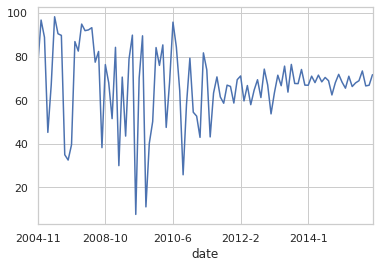

In [577]:
microwave['score'].groupby(microwave['date']).mean().plot()  # 到这里是按月分组


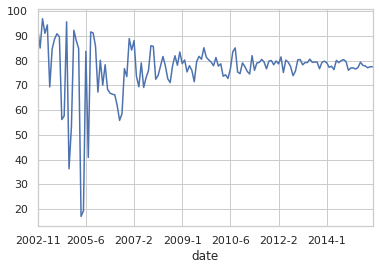

In [589]:
hairdryer['score'].groupby(hairdryer['date']).mean().plot()  # 到这里是按月分组


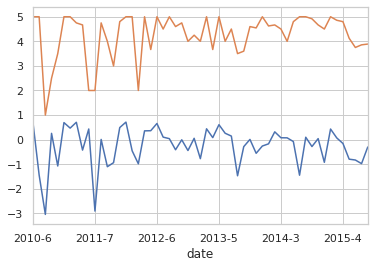

In [590]:
pacifier['total_sentiscore'][pacifier['product_title']=='philips avent bpa free contemporary freeflow pacifier'].groupby(pacifier['date']).mean().plot()  # 到这里是按月
pacifier['star_rating'][pacifier['product_title']=='philips avent bpa free contemporary freeflow pacifier'].groupby(pacifier['date']).mean().plot()  # 到这里是按月


In [563]:
pacifier['product_title'].groupby(pacifier['product_title'],).count().sort_values(ascending=False).head(10)

product_title
philips avent bpa free soothie pacifier, 0-3 months, 2 pack, packaging may vary    809
wubbanub infant pacifier - giraffe                                                 520
wubbanub brown monkey pacifier                                                     467
wubbanub soft toy and pacifier                                                     383
wubbanub brown puppy pacifier                                                      258
philips avent bpa free contemporary freeflow pacifier                              250
fctry - baby pacifiers                                                             239
wubbanub lamb infant pacifier                                                      225
wubbanub elephant pacifier                                                         183
wubbanub tabby kitten pacifier                                                     163
Name: product_title, dtype: int64

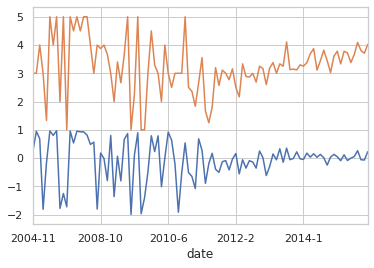

In [580]:
microwave['total_sentiscore'].groupby(microwave['date']).mean().plot()  # 到这里是按月
microwave['star_rating'].groupby(microwave['date']).mean().plot()  # 到这里是按月

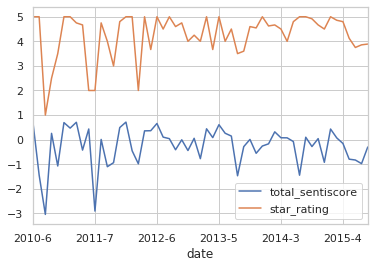

In [565]:
pacifier['total_sentiscore'][pacifier['product_title']=='philips avent bpa free contemporary freeflow pacifier'].groupby(pacifier['date']).mean().plot()  # 到这里是按月
pacifier['star_rating'][pacifier['product_title']=='philips avent bpa free contemporary freeflow pacifier'].groupby(pacifier['date']).mean().plot()  # 到这里是按月
plt.legend()

In [376]:
from pandas.tseries.offsets import Day
data1['review_date']=data1['review_date']+30*Day()

In [375]:
data1=pacifier

In [386]:
data1=pacifier['star_rating'].groupby(pacifier['date']).mean().sort_index(ascending=False)

In [387]:
data2=pacifier['total_sentiscore'].groupby(pacifier['date']).mean().sort_index(ascending=False)

In [388]:
data1

date
2015-8     4.341074
2015-7     4.396739
2015-6     4.349630
2015-5     4.265497
2015-4     4.350238
             ...   
2004-6     2.000000
2004-5     2.000000
2004-4     4.500000
2003-4     2.000000
2003-12    1.000000
Name: star_rating, Length: 120, dtype: float64

date
2015-8     0.554219
2015-7     0.599876
2015-6     0.584111
2015-5     0.573250
2015-4     0.561338
             ...   
2005-10    0.901500
2004-6     0.764100
2004-5     0.918600
2004-4     0.761350
2003-4     0.583500
Name: total_sentiscore, Length: 119, dtype: float64

In [585]:
pacifier['score'].groupby(pacifier['date']).mean()  # 到这里是按月分组

date
2003-12    93.703623
2003-4     79.008998
2004-4     83.698495
2004-5     89.512056
2004-6     85.531461
             ...    
2015-4     78.027712
2015-5     78.884200
2015-6     78.107498
2015-7     79.503906
2015-8     78.896465
Name: score, Length: 118, dtype: float64

In [398]:
data1[1:].corr(data2[:-1], method='pearson')

0.48418091481016806

In [399]:
import scipy.stats as stats

In [414]:
stats.kendalltau(data1.values,data2.values)

KendalltauResult(correlation=0.2280295176334507, pvalue=0.0002444491019322087)

In [404]:
from sklearn.linear_model import LinearRegression

In [405]:
lnmodel=LinearRegression()

In [411]:
lnmodel.fit(data1[1:].values.reshape(1, -1),data2[:-1])

ValueError: Found input variables with inconsistent numbers of samples: [1, 119]

In [413]:
data1[1:].values.reshape(1,-1)

array([[4.39673913, 4.34962963, 4.26549708, 4.35023772, 4.37851038,
        4.31967213, 4.41192788, 4.32469512, 4.31258645, 4.37959866,
        4.33486239, 4.28125   , 4.31640625, 4.35830619, 4.24414062,
        4.31448158, 4.42277992, 4.46050096, 4.29770992, 4.25268817,
        4.34545455, 4.23060797, 4.39830508, 4.39303483, 4.33333333,
        4.47826087, 4.32057416, 4.3151751 , 4.22961373, 4.36151603,
        4.21710526, 4.41818182, 4.33333333, 4.24418605, 4.22222222,
        3.98214286, 4.38888889, 4.11428571, 4.26829268, 4.390625  ,
        4.15857605, 4.39655172, 4.16030534, 4.09174312, 3.98360656,
        4.13235294, 3.96551724, 3.85714286, 4.38888889, 4.27586207,
        4.52941176, 4.04390244, 4.14503817, 4.27777778, 4.08      ,
        4.19444444, 4.41666667, 4.52173913, 3.82608696, 4.        ,
        3.6       , 4.41666667, 4.07407407, 4.52272727, 4.19444444,
        4.03333333, 4.64285714, 4.38461538, 4.16666667, 4.42857143,
        4.66666667, 4.        , 4.84615385, 4.  

In [570]:
pacifier['total_sentiscore'].groupby(pacifier['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
munchkin 2 pk bling knob pacifier 0- 6 month (discontinued by manufacturer)          0.826833
cuddlesme plush puppy toy with detachable pacifier, fda listed medical device        0.823150
mam crystal print silicone pacifier - (6+ months)                                    0.793686
two front teeth (red lips) baby pacifier (discontinued by manufacturer)              0.778723
nuk 8 count silicone pacifier                                                        0.776191
2 mam ulti trends baby pacifiers for age 6+ months                                   0.772508
pacipals huggable pacifier (ooie the monkey) -- new packaging, same great product    0.770897
mam crystal print silicone pacifier - green (6+ months)                              0.744655
playtex binky most like mothers nipple latex pacifiers 0-24 months                   0.738440
philips avent newborn pacifier, 0-2 months                                           0.729321
Name: total_sentiscore, dtype: float64

In [571]:
microwave['score'].groupby(microwave['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
pem31dmww%2d profile spacemaker ii%2dcountertop microwave oven %2d white                                                   83.027511
sharp r1874t 1.1 cu. ft. stainless steel over-the-range microwave                                                          81.831140
whirlpool stainless look countertop microwave, 0.5 cu. feet, wmc20005yd                                                    80.854107
sharp kb6524p 24 microwave drawer oven with front-mounted touch controls, microwave drawer oven                            80.079032
haier hmv1630dbbb 30-inch over-the-range 1000 watt microwave, black                                                        77.230138
sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves                                                                  76.452489
whirlpool wmc20005yw  countertop microwave, 0.5 cu. ft., white                                                             76.043282
samsung counter top microwave                          

In [572]:
hairdryer['score'].groupby(hairdryer['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
turbo power twin turbo 2600 professional hair dryer                                                                                90.615680
hot tools 1059 tourmaline ionic standing hair dryer hood rolling salon wheels                                                      88.323543
remington d3190a damage control ceramic hair dryer, ionic dryer, hair dryer, purple                                                88.213108
conair hhr320rw pro style 1600 watt hard bonnet hair dryer.                                                                        87.984926
t3 featherweight hair dryer tourmaline ionic bespoke labs 83808                                                                    86.759987
t3 evolution hair dryer professional ceramic bespoke labs, 83888                                                                   85.998624
babyliss pro babfrv2 volare ferrari designed professional luxury mid sized hair dryer, red, 2000 watts by babyliss pro [beauty]    85.507775

In [573]:
pacifier['score'].groupby(pacifier['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
pacipals huggable pacifier (ooie the monkey) -- new packaging, same great product    94.355559
born free bpa-free bliss orthodontic pacifier, neutral, 0-6m                         91.333179
munchkin 2 pk bling knob pacifier 0- 6 month (discontinued by manufacturer)          90.367389
cuddlesme plush puppy toy with detachable pacifier, fda listed medical device        90.322812
nuk 8 count silicone pacifier                                                        89.754458
2 mam ulti trends baby pacifiers for age 6+ months                                   89.709881
philips avent newborn pacifier, 0-2 months                                           89.673160
#1/16 serta sheep baby with pacifier                                                 89.565314
nuk orthostar soft orthodontic pacifiers girl 0-3 months bpa free new nuk size       89.472295
mam crystal print silicone pacifier - green (6+ months)                              89.372769
Name: score, dtype: float64

In [569]:
microwave['product_title'].groupby(microwave['product_title'],).count().sort_values(ascending=False).head(10)

product_title
danby 0.7 cu.ft. countertop microwave                                        394
samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave         80
whirlpool wmc20005yb 0.5 cu. ft. black countertop microwave                   79
whirlpool wmc20005yw  countertop microwave, 0.5 cu. ft., white                78
whirlpool stainless look countertop microwave, 0.5 cu. feet, wmc20005yd       76
microwave cavity paint 98qbp0302                                              74
sharp microwave drawer oven                                                   72
pem31smss ge profile spacemaker countertop microwave oven stainless steel     49
sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves                     45
samsung counter top microwave                                                 44
Name: product_title, dtype: int64

In [425]:
hairdryer['product_title'].groupby(hairdryer['product_title'],).count().sort_values(ascending=False).head(10)

product_title
remington ac2015 t|studio salon collection pearl ceramic hair dryer, deep purple    587
andis 1875-watt fold-n-go ionic hair dryer , silver/black (80020)                   555
conair 1875 watt tourmaline ceramic hair dryer                                      535
conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer          424
revlon essentials 1875w fast dry hair dryer, rv408                                  407
conair 1875 watt cord keeper 2-in-1 hair dryer, black                               363
andis 1600w quiet hangup hair dryer with night light                                326
andis 1875-watt tourmaline ceramic ionic styling hair dryer                         260
conair minipro tourmaline ceramic styler / hair dryer; pink                         253
andis 1875 watt professional ceramic ionic hair dryer                               233
Name: product_title, dtype: int64

In [437]:
bool=hairdryer.product_title.str.contains('dryer')

In [432]:
hairdryer.product_title=hairdryer.product_title.apply(str)

In [438]:
bool.value_counts()

True     11105
False      365
Name: product_title, dtype: int64

In [439]:
realhairdryer=hairdryer[bool]

In [440]:
realhairdryer['score'].groupby(realhairdryer['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
turbo power twin turbo 2600 professional hair dryer                                                                                92.255174
t3 featherweight hair dryer tourmaline ionic bespoke labs 83808                                                                    87.983374
babyliss pro babfrv2 volare ferrari designed professional luxury mid sized hair dryer, red, 2000 watts by babyliss pro [beauty]    87.476216
remington d3190a damage control ceramic hair dryer, ionic dryer, hair dryer, purple                                                87.338435
turbo power 1500 hair dryer                                                                                                        86.312189
mangroomer 1680xl-6 professional ionic hair dryer for men                                                                          85.510723
conair hair dryer silver bird 2000 w turbo                                                                                         85.239408

In [441]:
realmicrowave=microwave[microwave.product_title.str.contains('microwave')]

In [442]:
realmicrowave['score'].groupby(realmicrowave['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
sharp r1874t 1.1 cu. ft. stainless steel over-the-range microwave                                                          78.638513
whirlpool stainless look countertop microwave, 0.5 cu. feet, wmc20005yd                                                    77.612024
pem31dmww%2d profile spacemaker ii%2dcountertop microwave oven %2d white                                                   76.914731
sharp kb6524p 24 microwave drawer oven with front-mounted touch controls, microwave drawer oven                            76.365881
jx7227sfss - deluxe built-in trim kit for 2.2 microwave ovens/ compatible with peb7226sf models/ stainless steel finish    75.111400
microwave cavity paint 98qbp0302                                                                                           74.522761
sharp rmotda252wrzz microwave turntable motor                                                                              74.513837
sharp 950-watt 1-2/5-cubic-foot over-the-range microwav

In [445]:
realpacifier=pacifier[pacifier.product_title.str.contains('pacifier')]

In [471]:
realpacifier['score'].groupby(realpacifier['product_title'],).mean().sort_values(ascending=False).head(10)

product_title
nuk 8 count silicone pacifier                                                                                                                                                                                                                                                                                                             90.387469
2 mam ulti trends baby pacifiers for age 6+ months                                                                                                                                                                                                                                                                                        90.360897
#1/16 serta sheep baby with pacifier                                                                                                                                                                                                                                                                              

In [447]:
pacifier.shape

(18939, 22)

In [451]:
rea

(1601, 22)

In [453]:
microwave.shape

(1615, 22)

In [476]:
topproduct=pd.concat([realpacifier['score'].groupby(realpacifier['product_title'],).mean().sort_values(ascending=False).head(10),realhairdryer['score'].groupby(realhairdryer['product_title'],).mean().sort_values(ascending=False).head(10),realmicrowave['score'].groupby(realmicrowave['product_title'],).mean().sort_values(ascending=False).head(10)])

In [474]:
topproduct.to_excel('topproduct.xlsx')

In [477]:
downproduct=pd.concat([realpacifier['score'].groupby(realpacifier['product_title'],).mean().sort_values(ascending=False).tail(10),realhairdryer['score'].groupby(realhairdryer['product_title'],).mean().sort_values(ascending=False).tail(10),realmicrowave['score'].groupby(realmicrowave['product_title'],).mean().sort_values(ascending=False).tail(10)])

In [479]:
downproduct.to_excel('downproduct.xlsx')

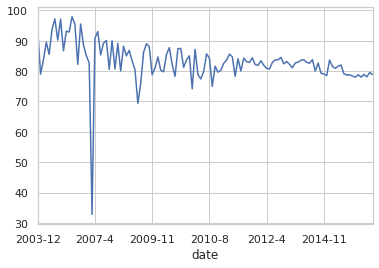

In [575]:
pacifier['score'].groupby(pacifier['date']).mean().plot()  # 到这里是按月分组

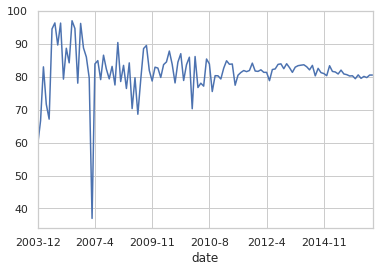

In [483]:
realpacifier['score'].groupby(realpacifier['date']).mean().plot()  # 到这里是按月分组

In [576]:
hairdryer

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,verified_purchase,review_headline,review_body,review_date,review,total_sentiscore,sentiment,helping_rate,score,date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,...,1,Works great,Works great!,2015-08-31,work great,0.572888,positive,0.500000,85.156563,2015-8
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,...,1,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015-08-31,love travel blow dryer easy lift hair big powe...,0.813311,positive,0.500000,88.040536,2015-8
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,...,1,Five Stars,Love this dryer!,2015-08-31,star dryer,0.186084,positive,0.333333,79.772652,2015-8
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,...,1,Five Stars,styling hair in style,2015-08-31,star hair style,-1.182857,positive,0.500000,64.095715,2015-8
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,...,1,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,2015-08-31,great cord length last week great cord length ...,0.756272,positive,0.500000,87.356328,2015-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,...,1,great hair!,"I just purchased this dryer, and I really like...",2002-08-21,great hair way hair short time healthy head fi...,0.669997,positive,0.750000,90.339874,2002-8
11466,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,...,1,Disappointment with dryer,I purchased it because it was supposed to be q...,2002-08-13,bit loud old heavy cumbersome hard manage loca...,-1.567616,negtive,0.794118,48.419099,2002-8
11467,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,...,1,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",2002-07-13,good love hair shiny thought straight hair hai...,0.806360,positive,0.833333,94.405559,2002-7
11468,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,...,1,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,2002-04-20,excellent fine limp hair hairdryer expection s...,0.597012,positive,0.887640,90.998031,2002-4


In [595]:
hairdryer=hairdryer.set_index(['review_date'])
microwave=microwave.set_index(['review_date'])
pacifier=pacifier.set_index(['review_date'])

In [ ]:
def testcorr(df,f):
    data=df['star_rating'].groupby(pacifier['date']).mean()
    

In [597]:
hairdryer['star_rating'].resample('M').mean().head(20)

review_date
2002-03-31    3.0
2002-04-30    5.0
2002-05-31    NaN
2002-06-30    NaN
2002-07-31    5.0
2002-08-31    3.0
2002-09-30    NaN
2002-10-31    NaN
2002-11-30    4.0
2002-12-31    5.0
2003-01-31    4.5
2003-02-28    4.0
2003-03-31    4.0
2003-04-30    5.0
2003-05-31    NaN
2003-06-30    NaN
2003-07-31    NaN
2003-08-31    NaN
2003-09-30    NaN
2003-10-31    NaN
Freq: M, Name: star_rating, dtype: float64

In [596]:
hairdryer

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review,total_sentiscore,sentiment,helping_rate,score,date
review_date,,,,,,,,,,,,,,,,,,,,
2002-03-02,US,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,3,320,332,1.0,1,"Some pluses, some minuses",This is my only experience with an ionic hair ...,plus experience ionic hair several expection f...,0.807587,positive,0.961078,96.905086,2002-3
2002-04-20,US,38947355,R3JMGN42OJCL97,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,78,87,1.0,1,Excellent for fine/limp hair,This hairdryer far exceeded my expection for<B...,excellent fine limp hair hairdryer expection s...,0.597012,positive,0.887640,90.998031,2002-4
2002-07-13,US,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,5,4,4,1.0,1,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",good love hair shiny thought straight hair hai...,0.806360,positive,0.833333,94.405559,2002-7
2002-08-13,US,43977044,R2JQPUYU65C4QD,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,Beauty,1,26,32,1.0,1,Disappointment with dryer,I purchased it because it was supposed to be q...,bit loud old heavy cumbersome hard manage loca...,-1.567616,negtive,0.794118,48.419099,2002-8
2002-08-21,US,35599734,R2O50YNP83CG34,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,14,18,1.0,1,great hair!,"I just purchased this dryer, and I really like...",great hair way hair short time healthy head fi...,0.669997,positive,0.750000,90.339874,2002-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,1.0,1,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,great cord length last week great cord length ...,0.756272,positive,0.500000,87.356328,2015-8
2015-08-31,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,1.0,1,Five Stars,styling hair in style,star hair style,-1.182857,positive,0.500000,64.095715,2015-8
2015-08-31,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,1.0,1,Five Stars,Love this dryer!,star dryer,0.186084,positive,0.333333,79.772652,2015-8


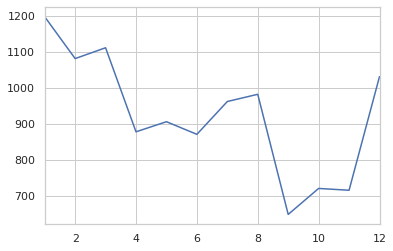

In [614]:
hairdryer['vine'].groupby(lambda x:x.month).count().plot()

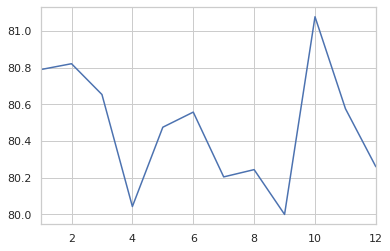

In [617]:
pacifier['score'].groupby(lambda x:x.month).mean().plot()


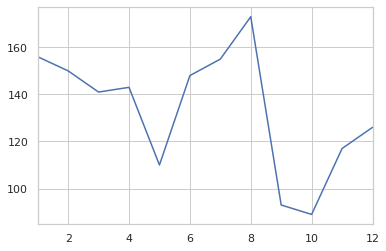

In [615]:
microwave['vine'].groupby(lambda x:x.month).count().plot()

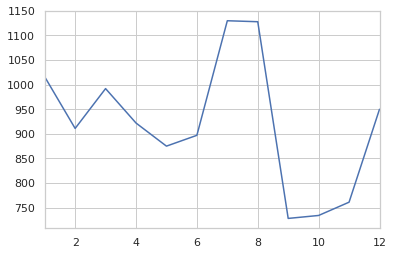

In [616]:
pacifier['vine'].groupby(lambda x:x.month).count().plot()

In [618]:
pacifier['star_rating'].resample('M').mean()

review_date
2003-04-30    2.000000
2003-05-31         NaN
2003-06-30         NaN
2003-07-31         NaN
2003-08-31         NaN
                ...   
2015-04-30    4.365385
2015-05-31    4.398417
2015-06-30    4.422111
2015-07-31    4.386037
2015-08-31    4.442222
Freq: M, Name: star_rating, Length: 149, dtype: float64

In [619]:
pacifier['score'].groupby('M').mean()

review_date
2003-04-30    79.008998
2003-05-31          NaN
2003-06-30          NaN
2003-07-31          NaN
2003-08-31          NaN
                ...    
2015-04-30    78.027712
2015-05-31    78.884200
2015-06-30    78.107498
2015-07-31    79.503906
2015-08-31    78.896465
Freq: M, Name: score, Length: 149, dtype: float64

In [630]:
stats.stats.pearsonr(pacifier['star_rating'].groupby(pacifier['date']).mean().values,pacifier['total_sentiscore'].groupby(pacifier['date']).mean().values)

(0.33406933229386615, 0.00021808254432207697)

In [631]:
stats.stats.pearsonr(hairdryer['star_rating'].groupby(hairdryer['date']).mean().values,hairdryer['total_sentiscore'].groupby(hairdryer['date']).mean().values)

(0.6872804188382593, 6.796755985316962e-21)

In [632]:
stats.stats.pearsonr(microwave['star_rating'].groupby(microwave['date']).mean().values,microwave['total_sentiscore'].groupby(microwave['date']).mean().values)

(0.6182940965786683, 7.174543706032444e-12)

In [633]:
stats.stats.pearsonr(pacifier['star_rating'].groupby(pacifier['date']).mean().values[:-1],pacifier['total_sentiscore'].groupby(pacifier['date']).mean().values[1:])

(-0.018755039692640352, 0.8409282257732109)

In [637]:
stats.stats.pearsonr(hairdryer['star_rating'].groupby(hairdryer['date']).mean().values[:-1],hairdryer['total_sentiscore'].groupby(hairdryer['date']).mean().values[1:])

(0.18039194118999569, 0.03358246633885702)

In [635]:
stats.stats.pearsonr(microwave['star_rating'].groupby(microwave['date']).mean().values[:-1],microwave['total_sentiscore'].groupby(microwave['date']).mean().values[1:])

(-0.028058168837017693, 0.7827908288076241)

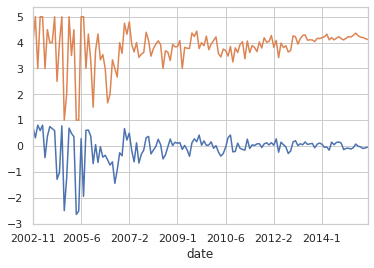

In [638]:
hairdryer['total_sentiscore'].groupby(hairdryer['date']).mean().plot()  # 到这里是按月分组
hairdryer['star_rating'].groupby(hairdryer['date']).mean().plot()  # 到这里是按月分组


In [640]:
stats.stats.pearsonr(hairdryer['star_rating'].groupby(level=0).mean().values[:-1],hairdryer['total_sentiscore'].groupby(level=0).mean().values[1:])

(0.03323874241224989, 0.11070451224009534)

In [641]:
hairdryer['star_rating'].groupby(level=0).mean()

review_date
2002-03-02    3.000
2002-04-20    5.000
2002-07-13    5.000
2002-08-13    1.000
2002-08-21    5.000
              ...  
2015-08-27    4.400
2015-08-28    4.625
2015-08-29    4.300
2015-08-30    4.125
2015-08-31    4.200
Name: star_rating, Length: 2305, dtype: float64

In [642]:
stats.stats.pearsonr(microwave['star_rating'].groupby(level=0).mean().values[:-1],microwave['total_sentiscore'].groupby(level=0).mean().values[1:])

(0.009552973746240381, 0.7741172609137708)

In [643]:
stats.stats.pearsonr(pacifier['star_rating'].groupby(level=0).mean().values[:-1],pacifier['total_sentiscore'].groupby(level=0).mean().values[1:])

(-0.02567887292450184, 0.2641232698066462)

In [644]:
pacifier.to_excel('pacifier_3.xlsx')
microwave.to_excel('microwave_3.xlsx')
hairdryer.to_excel('hairdryer_3.xlsx')